# Ecommerce UK Retailer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ec = pd.read_csv(r"C:\Users\param\Ecommerce - UK Retailer.csv", encoding= 'unicode_escape')
print("ecommerce data read successfully")

ecommerce data read successfully


In [3]:
ec.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
ec.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
ec.shape

(541909, 8)

In [6]:
ec.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
ec.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Some changes made to Data 

In [8]:
# change the column names
ec.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [9]:
#change the invoice_date format - String to Timestamp format
ec['invoice_date'] = pd.to_datetime(ec.invoice_date, format='%m/%d/%Y %H:%M')

### 2.Check for missing values in all columns and replace them with the appropriate metric 

In [10]:
ec.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
country              0
unit_price           0
invoice_date         0
quantity             0
stock_code           0
invoice_num          0
dtype: int64

In [11]:
ec = ec.dropna(axis=0, subset=['cust_id'])

In [12]:
ec.isnull().sum().sort_values(ascending=False)

country         0
cust_id         0
unit_price      0
invoice_date    0
quantity        0
description     0
stock_code      0
invoice_num     0
dtype: int64

### 3.Remove Duplicate Rows 

In [13]:
ec.shape

(406829, 8)

In [14]:
ec = ec.drop_duplicates()

In [15]:
ec.shape

(401604, 8)

###  4.Remove rows which have negative values in Quantity column

In [16]:
ec = ec[ec.quantity > 0]

In [17]:
ec.shape

(392732, 8)

In [18]:
ec.describe()

,quantity,unit_price,cust_id
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [19]:
ec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  object        
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   cust_id       392732 non-null  float64       
 7   country       392732 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


### 5.Add the columns - Month, Day and Hour for the invoice 

In [20]:
ec.insert(loc=2, column='year_month', value=ec['invoice_date'].map(lambda x: 100*x.year + x.month))
ec.insert(loc=3, column='month', value=ec.invoice_date.dt.month)
# +1 to make Monday=1.....until Sunday=7
ec.insert(loc=4, column='day', value=(ec.invoice_date.dt.dayofweek)+1)
ec.insert(loc=5, column='hour', value=ec.invoice_date.dt.hour)

In [21]:
ec.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 6.How many orders made by the customers? 

In [22]:
ec.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17


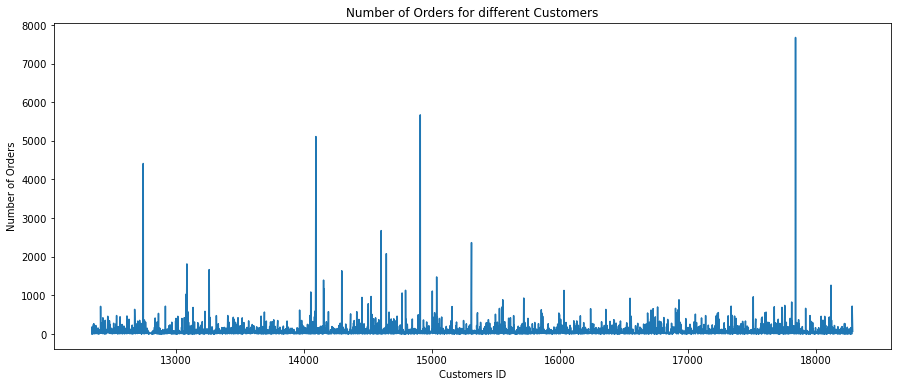

In [23]:
orders = ec.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### 7.TOP 5 customers with higher number of orders 

In [24]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413
1670,14606.0,United Kingdom,2677


### 8.How much money spent by the customers?

In [25]:
ec['amount_spent'] = ec['quantity'] * ec['unit_price']

In [26]:
# rearrange all the columns for easy reference
ec = ec[['invoice_num','stock_code','invoice_date','year_month','month','day','hour','description','quantity','unit_price',
'amount_spent','cust_id','country']]

In [27]:
ec.head()

,invoice_num,stock_code,invoice_date,year_month,month,day,hour,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,85123A,2010-12-01 08:26:00,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,71053,2010-12-01 08:26:00,201012,12,3,8,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,2010-12-01 08:26:00,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,2010-12-01 08:26:00,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,2010-12-01 08:26:00,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


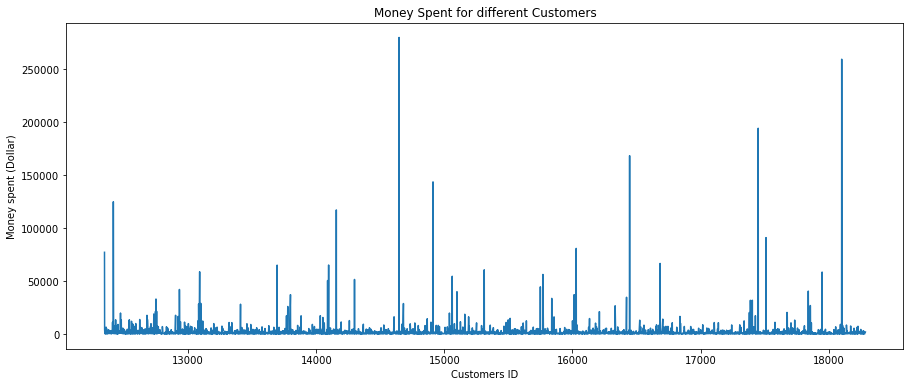

In [28]:
money_spent = ec.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()


plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### 9.TOP 5 customers with highest money spent 

In [29]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646.0,Netherlands,280206.02
4210,18102.0,United Kingdom,259657.30
3737,17450.0,United Kingdom,194390.79
3017,16446.0,United Kingdom,168472.50
1888,14911.0,EIRE,143711.17


### 10.How many orders per month? 

In [30]:
ec.head()

,invoice_num,stock_code,invoice_date,year_month,month,day,hour,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,85123A,2010-12-01 08:26:00,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850.0,United Kingdom
1,536365,71053,2010-12-01 08:26:00,201012,12,3,8,WHITE METAL LANTERN,6,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,2010-12-01 08:26:00,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,2010-12-01 08:26:00,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,2010-12-01 08:26:00,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850.0,United Kingdom


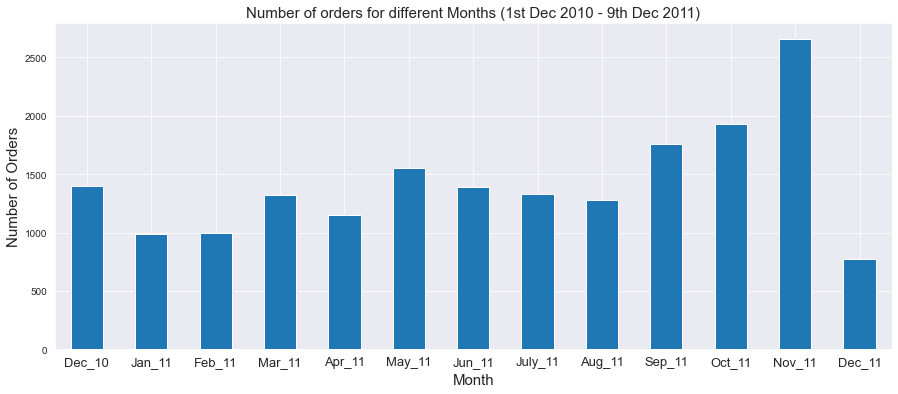

In [60]:
ax = ec.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11',
'Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### 11.How many orders per day? 

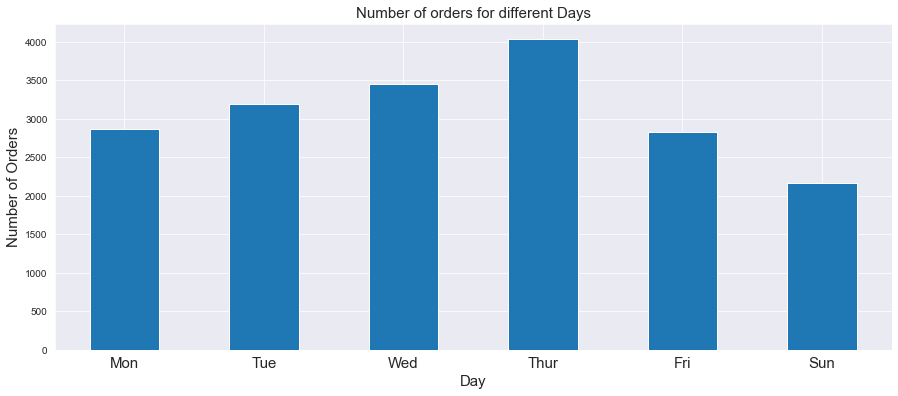

In [61]:
ax = ec.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

### 12.How many orders per hour? 

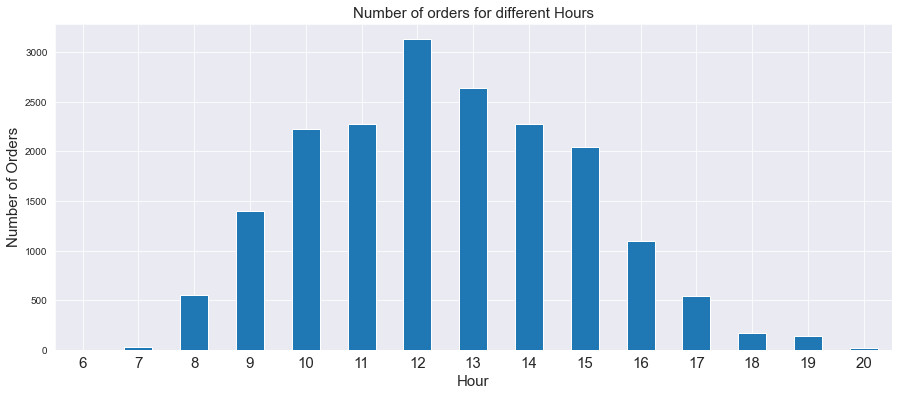

In [62]:
ax = ec.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

### 13.How many orders for each country? 

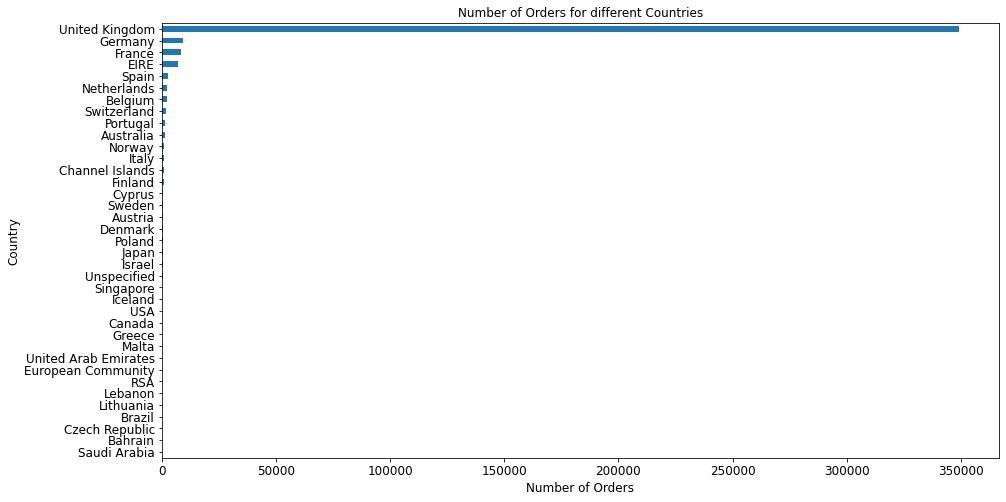

In [34]:
country_orders = ec.groupby('country')['invoice_num'].count().sort_values()

# plot number of orders for each country (with UK)
plt.subplots(figsize=(15,8))
country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

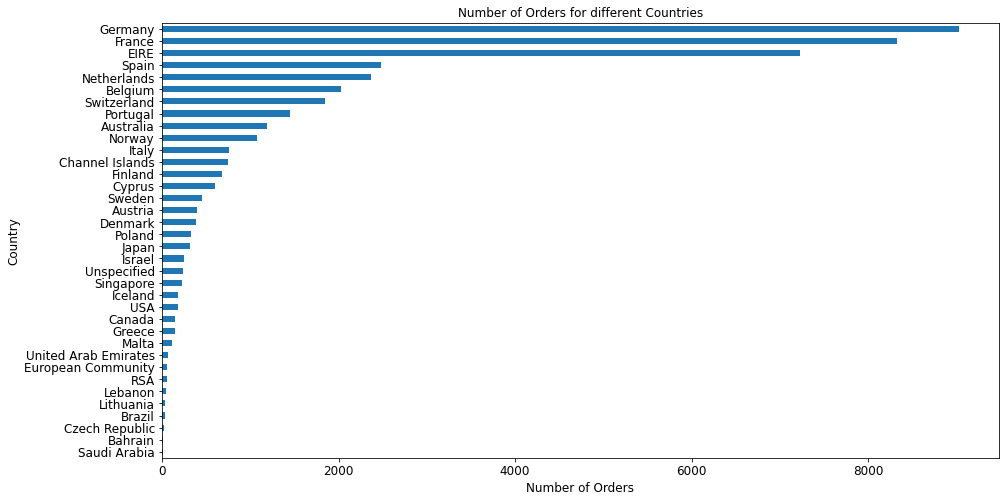

In [35]:
country_orders = ec.groupby('country')['invoice_num'].count().sort_values()
del country_orders['United Kingdom']

# plot number of orders for each country (without UK)
plt.subplots(figsize=(15,8))
country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

### 14.Orders trend across months 

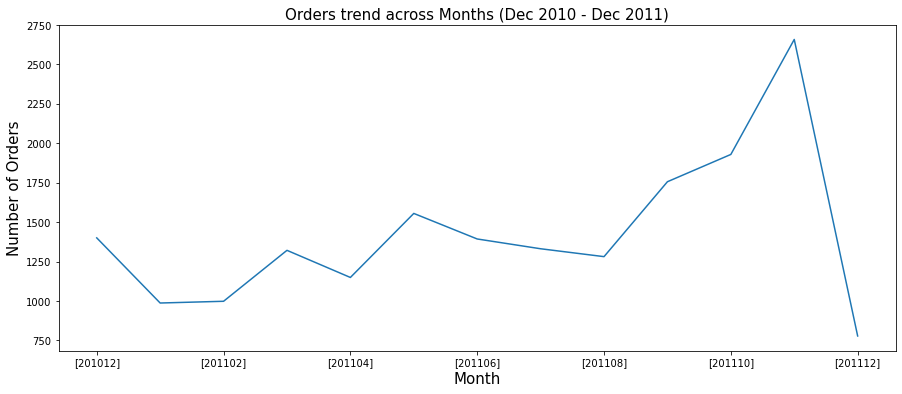

In [36]:
ax = ec.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='line',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Orders trend across Months (Dec 2010 - Dec 2011)',fontsize=15)
plt.show()

### 15.How much money spent by each country? 

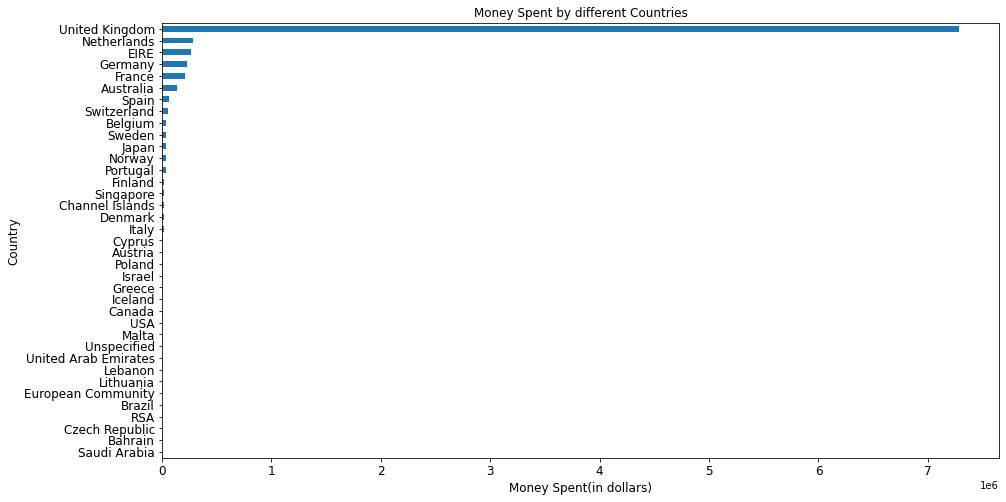

In [37]:
country_amount_spent = ec.groupby('country')['amount_spent'].sum().sort_values()

# plot money spent by each country (with UK)
plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent(in dollars)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

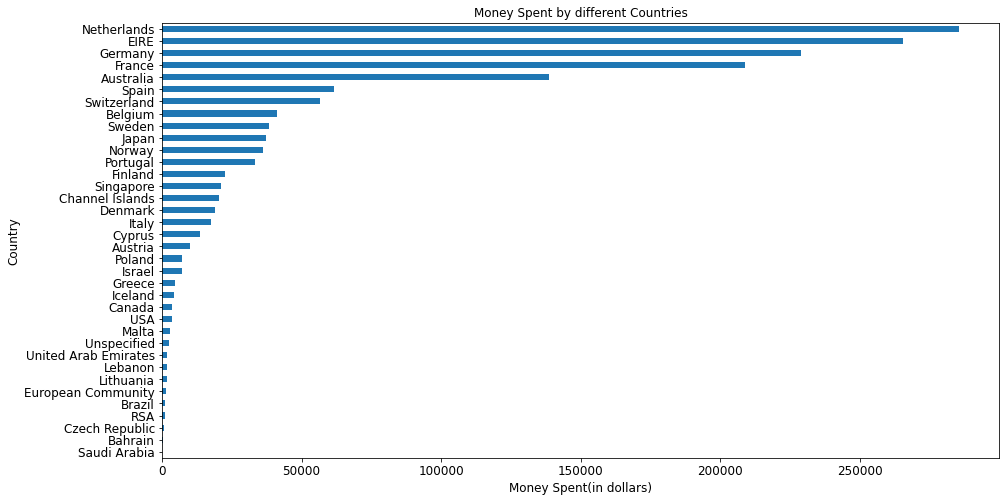

In [38]:
country_amount_spent = ec.groupby('country')['amount_spent'].sum().sort_values()
del country_amount_spent['United Kingdom']

# plot money spent by each country (without UK)
plt.subplots(figsize=(15,8))
country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent(in dollars)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

### 1.Perform Basic EDA

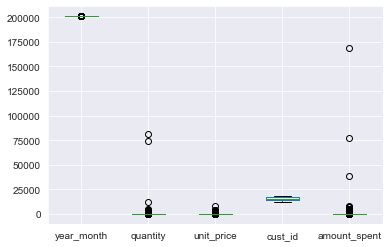

In [39]:
#a.Boxplot – All Numeric Variables

sns.set_style("darkgrid")
ec.boxplot(column=['year_month', 'quantity', 'unit_price', 'cust_id', 'amount_spent']);

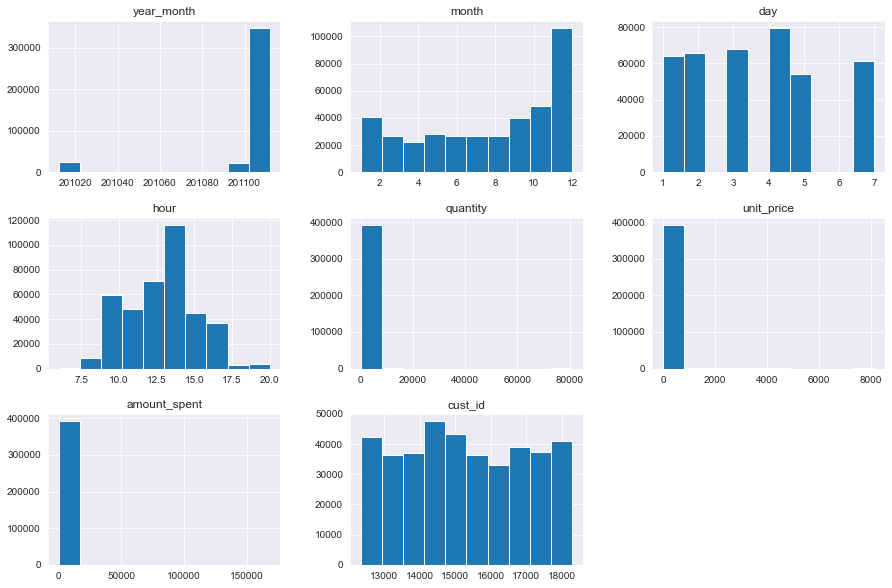

In [40]:
#b.Histogram – All Numeric Variables

ec.hist(figsize=(15, 10));

In [41]:
#c.Distribution Plot – All Numeric Variables

ec.unit_price.describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

Mean= 3.87
Median= 2.08


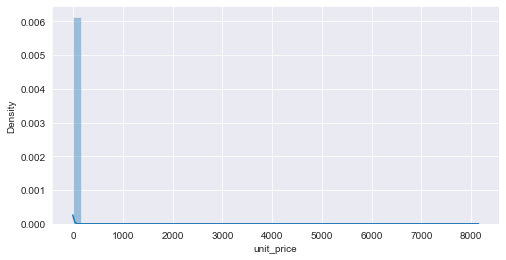

In [42]:
print('Mean= 3.87')
print('Median= 2.08')
plt.subplots(figsize=(8,4))
sns.distplot(ec.unit_price)
plt.show()

In [43]:
ec.quantity.describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: quantity, dtype: float64

Mean= 10.73
Median= 4


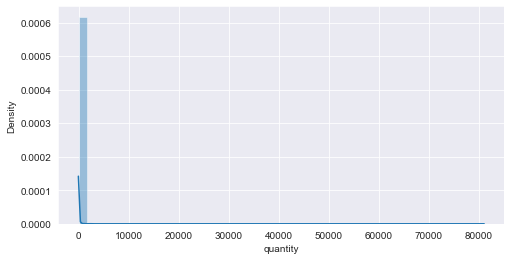

In [44]:
print('Mean= 10.73')
print('Median= 4')
plt.subplots(figsize=(8,4))
sns.distplot(ec.quantity)
plt.show()

In [45]:
ec.cust_id.describe()

count    392732.000000
mean      15287.734822
std        1713.567773
min       12346.000000
25%       13955.000000
50%       15150.000000
75%       16791.000000
max       18287.000000
Name: cust_id, dtype: float64

Mean= 15253.33
Median= 15152


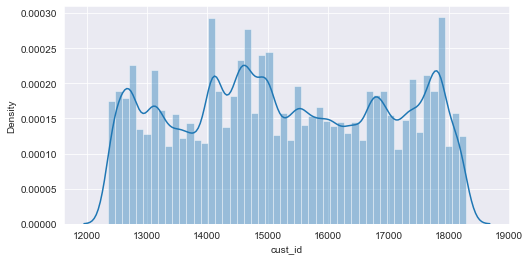

In [46]:
print('Mean= 15253.33')
print('Median= 15152')
plt.subplots(figsize=(8,4))
sns.distplot(ec.cust_id)
plt.show()

In [47]:
#d.Aggregation for all numerical Columns
ec.describe()

,year_month,month,day,hour,quantity,unit_price,amount_spent,cust_id
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,201101.064907,7.601935,3.606920,12.721579,13.153718,3.125596,22.629195,15287.734822
std,23.772532,3.415023,1.923892,2.276677,181.588420,22.240725,311.083465,1713.567773
min,201012.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,12346.000000
25%,201104.000000,5.000000,2.000000,11.000000,2.000000,1.250000,4.950000,13955.000000
50%,201107.000000,8.000000,3.000000,13.000000,6.000000,1.950000,12.390000,15150.000000
75%,201110.000000,11.000000,5.000000,14.000000,12.000000,3.750000,19.800000,16791.000000
max,201112.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,168469.600000,18287.000000


In [48]:
#e.Unique Values across all columns

uniqueValues = ec.nunique()
print('Unique Values across all columns :')
print(uniqueValues)

Unique Values across all columns :
invoice_num     18536
stock_code       3665
invoice_date    17286
year_month         13
month              12
day                 6
hour               15
description      3877
quantity          302
unit_price        441
amount_spent     2940
cust_id          4339
country            37
dtype: int64


In [49]:
#f.Duplicate values across all columns

# No duplicate values found because we have deleted all the rows with duplicate values prior only.

duplicatevalues = ec.duplicated()
ec[duplicatevalues]

,invoice_num,stock_code,invoice_date,year_month,month,day,hour,description,quantity,unit_price,amount_spent,cust_id,country


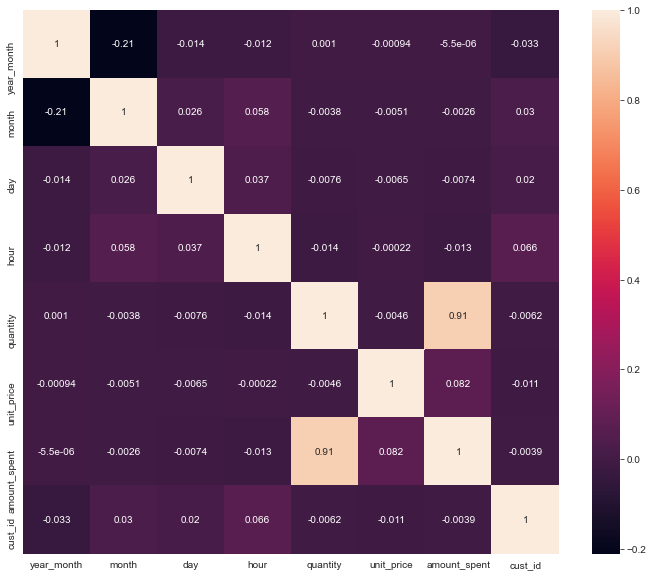

In [50]:
#g.Correlation – Heatmap - All Numeric Variables


fig, ax = plt.subplots(figsize=(12,10))   
sns.heatmap(ec.corr(), annot=True)
plt.show()

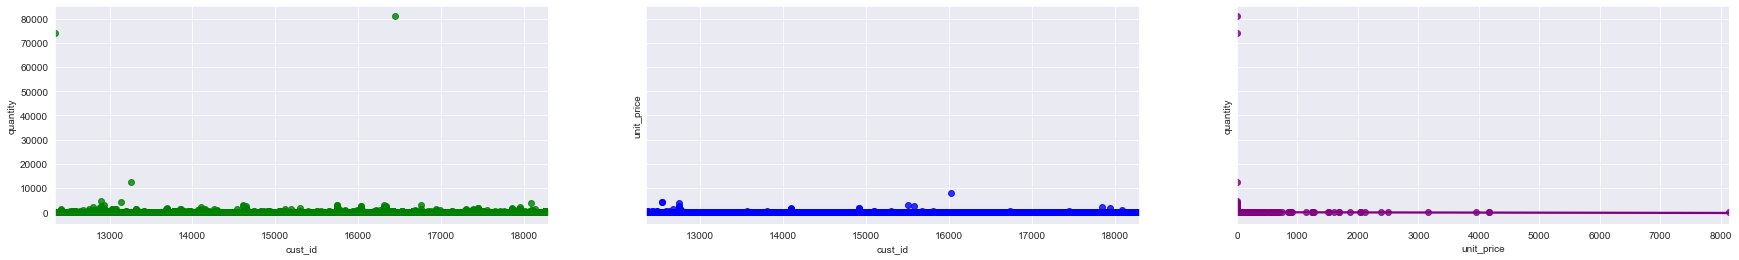

In [51]:
#h.Regression Plot - All Numeric Variables

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.set_figwidth(30)

sns.regplot(x=ec['cust_id'], y=ec['quantity'], color="g", ax=ax1)
sns.regplot(x=ec['cust_id'], y=ec['unit_price'], color="b", ax=ax2)
sns.regplot(x=ec['unit_price'], y=ec['quantity'], color="purple", ax=ax3);

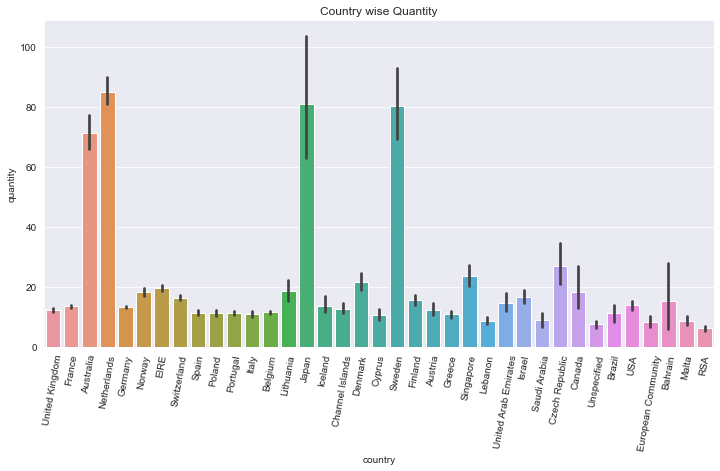

In [52]:
#i.Bar Plot – Every Categorical Variable vs every Numerical Variable

plt.figure(figsize=(12,6))
sns.barplot(x = 'country', y = 'quantity', data = ec)
plt.title('Country wise Quantity')
plt.xticks(rotation=80);

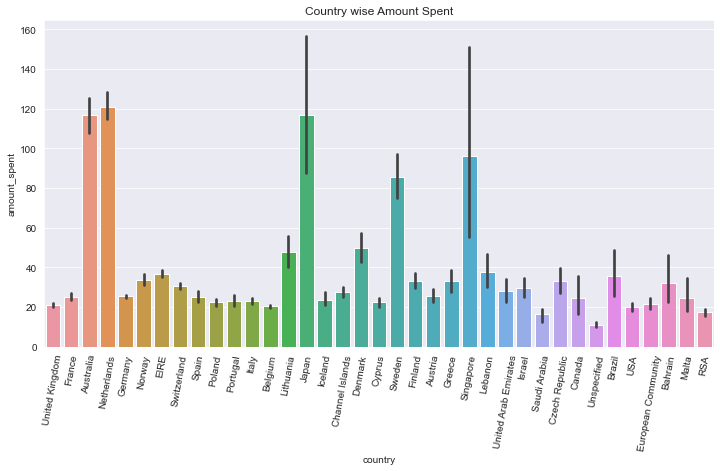

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x = 'country', y = 'amount_spent', data = ec)
plt.title('Country wise Amount Spent')
plt.xticks(rotation=80);

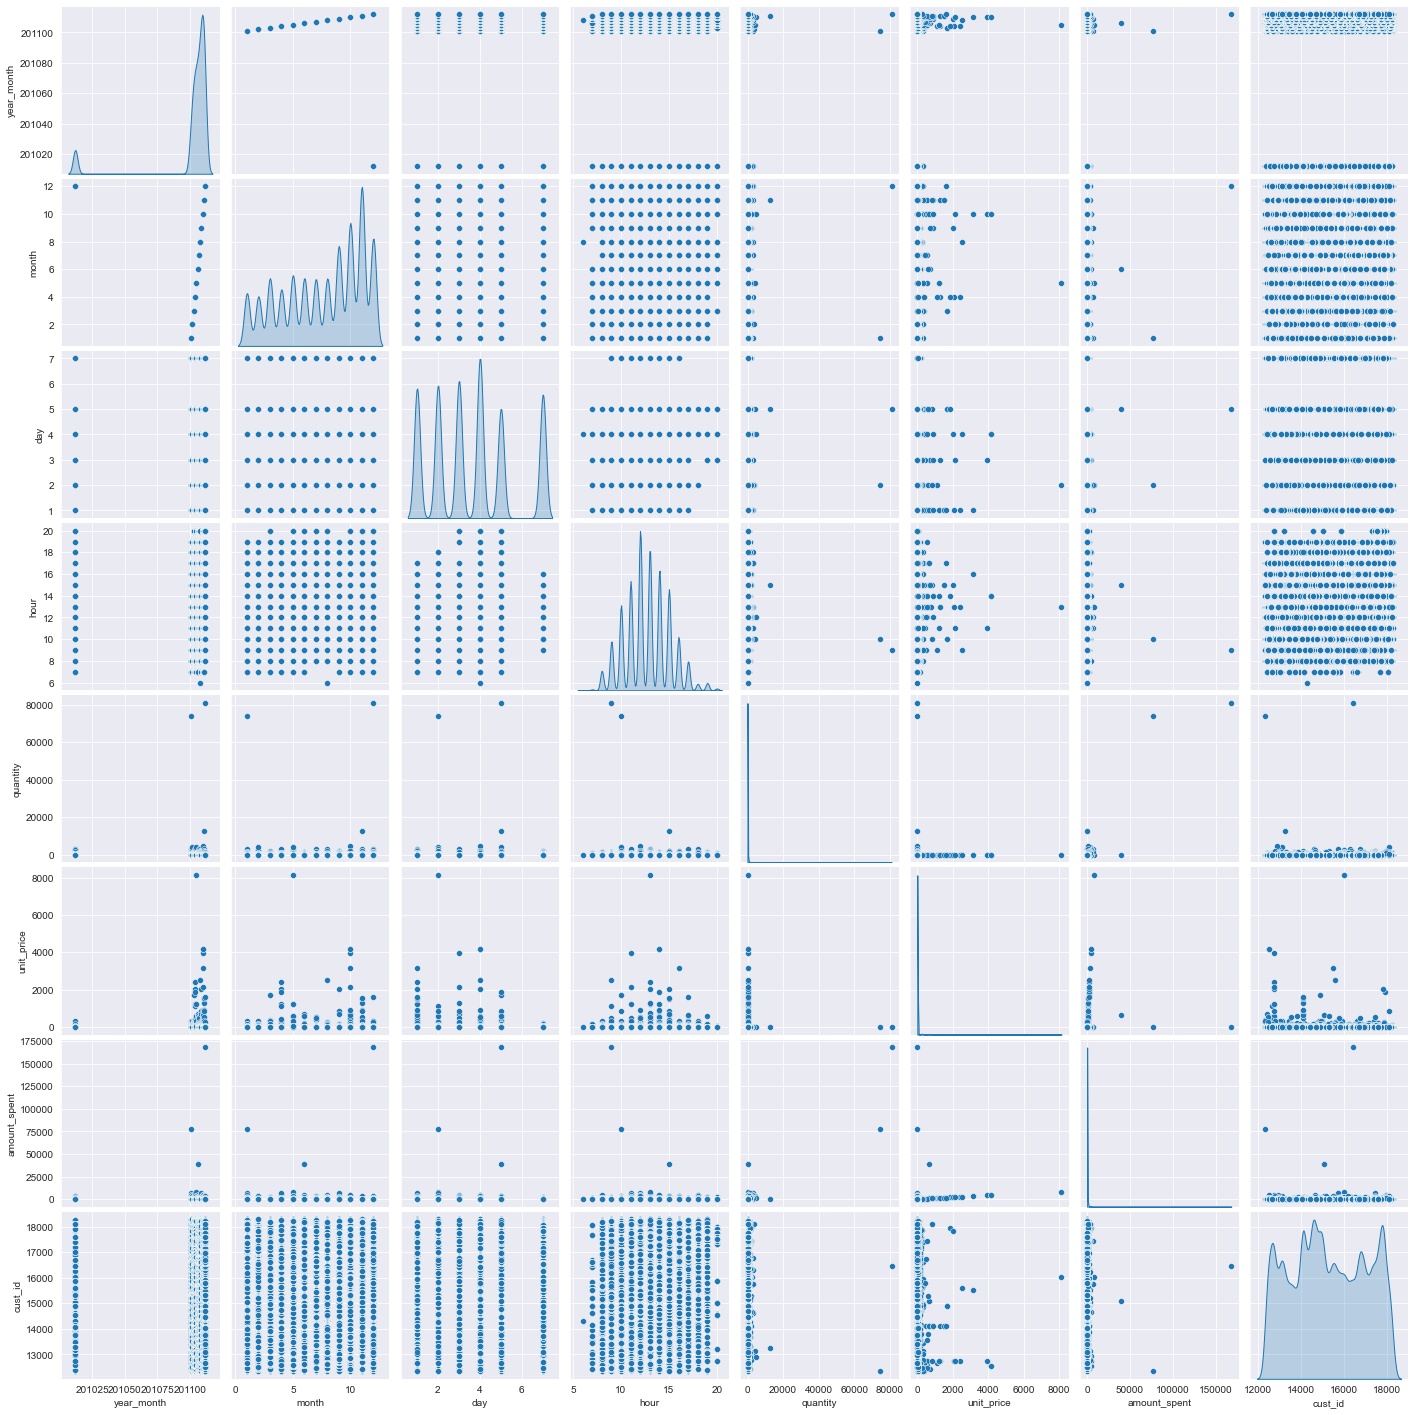

In [54]:
#j.Pair plot - All Numeric Variables

sns.pairplot(ec, diag_kind = 'kde')
plt.show();

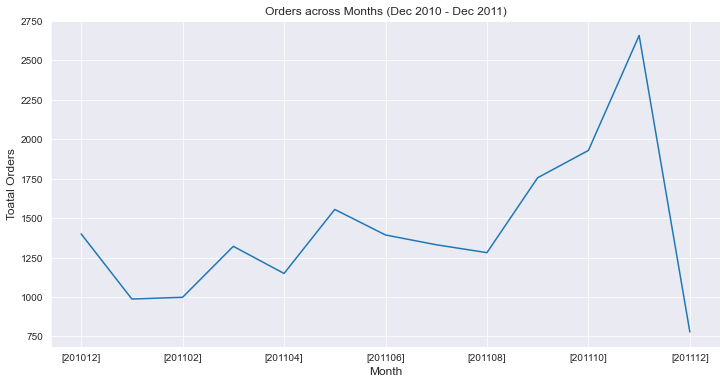

In [55]:
#k.Line chart to show the trend of data - All Numeric/Date Variables

ax = ec.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='line',figsize=(12,6))
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Toatal Orders',fontsize=12)
ax.set_title('Orders across Months (Dec 2010 - Dec 2011)',fontsize=12)
plt.show()

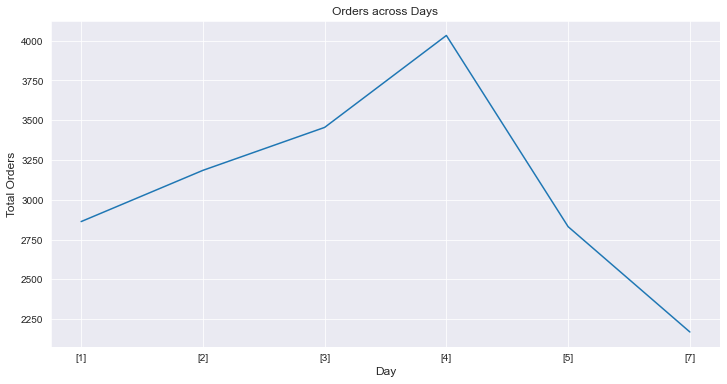

In [56]:
ax = ec.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='line',figsize=(12,6))
ax.set_xlabel('Day',fontsize=12)
ax.set_ylabel('Total Orders',fontsize=12)
ax.set_title('Orders across Days',fontsize=12)
plt.show()

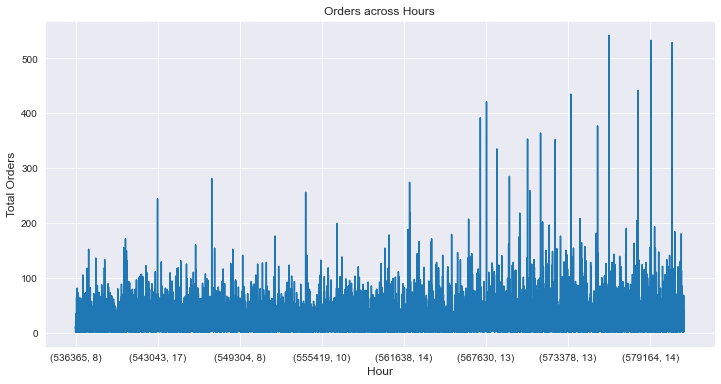

In [57]:
ax = ec.groupby('invoice_num')['hour'].value_counts().sort_index().plot(kind='line',figsize=(12,6))
ax.set_xlabel('Hour',fontsize=12)
ax.set_ylabel('Total Orders',fontsize=12)
ax.set_title('Orders across Hours',fontsize=12)
plt.show()

In [58]:
#l.Plot the skewness - All Numeric Variables

ec.skew(axis=0, skipna=True)

invoice_num      -0.175479
year_month       -3.407624
month            -0.440396
day               0.399278
hour              0.187081
quantity        400.811714
unit_price      202.750617
amount_spent    448.544281
cust_id           0.030195
dtype: float64

## Results obtained from Exploratory Data Analysis(EDA) 